# Modelling

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modelling with PCA
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import os

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [4]:
foodDf=pd.read_csv("final_project/marketing_campaign_clean3.csv")
foodDf

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Since_When,Age,Spending,Children,Family_Size,Parent
0,Graduate,Alone,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,971,64,1617,0,1,0
1,Graduate,Alone,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,125,67,27,2,3,1
2,Graduate,Partner,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,472,56,776,0,2,0
3,Graduate,Partner,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,65,37,53,1,3,1
4,Postgraduate,Partner,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,321,40,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Graduate,Partner,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,541,54,1341,1,3,1
2208,Postgraduate,Partner,64014.0,2,1,56,406,0,30,0,...,1,0,0,0,61,75,444,3,5,1
2209,Graduate,Alone,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,315,40,1241,0,1,0
2210,Postgraduate,Partner,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,316,65,843,1,3,1


# Principal Component Analysis

Principal Component Analysis (PCA). It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.
Discards low variance PCA features. Assumes the high variance features are informative.

Principal Component Analysis (PCA)
PCA is a variance-maximising technique that projects the original data  onto a direction that maximizes variance. PCA performs a linear mapping of the original data to a lower-dimensional space such that the variance of the data in the low-dimensional representation is maximized.

## Encoding categorical variables

In [5]:
#Getting only the categorical features
categorical = foodDf.select_dtypes(include='object')

In [6]:
categorical

,Education,Marital_Status
0,Graduate,Alone
1,Graduate,Alone
2,Graduate,Partner
3,Graduate,Partner
4,Postgraduate,Partner
...,...,...
2207,Graduate,Partner
2208,Postgraduate,Partner
2209,Graduate,Alone
2210,Postgraduate,Partner


### Ordinal categoricals

In [8]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal categoricals
categoricals_features_ord = categorical[['Education']]
categories = [["Undergraduate", "Graduate", "Postgraduate"]]

ordinal_features = OrdinalEncoder(categories=categories)
encoded_ordinal = pd.DataFrame(ordinal_features.fit_transform(categoricals_features_ord), columns=categoricals_features_ord.columns)

### Nominal categoricals

In [9]:
# One Hot Encoding
nominal_categorical = categorical[["Marital_Status"]]
encoded_nominal = pd.get_dummies(nominal_categorical, drop_first=True)

## Numerical variables

In [10]:
numerical = foodDf.select_dtypes(include='number')

In [11]:
numerical

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Since_When,Age,Spending,Children,Family_Size,Parent
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,971,64,1617,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,125,67,27,2,3,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,472,56,776,0,2,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,65,37,53,1,3,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,321,40,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,541,54,1341,1,3,1
2208,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,61,75,444,3,5,1
2209,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,315,40,1241,0,1,0
2210,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,316,65,843,1,3,1


In [12]:
#Deleting the numerical columns we don't need for the clustering
numerical_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
numerical = numerical.drop(numerical_to_drop, axis=1)

In [13]:
#Put it all together to one dataframe
# Concatinating numerical and categoricals together
ds = pd.concat([numerical,encoded_ordinal,encoded_nominal],axis=1)

## Scaling with StandardScaler

In [14]:
#Scaling
## Applying StandardScaler, each feature of your data should be normally distributed
## It will scale the distribution to a mean of zero and a standard deviation of one
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [308]:
# Let's check whether the normalized data has a mean of zero and a standard deviation of one.
#np.mean(scaled_ds), np.std(scaled_ds)

(Education            1.278864e-16
 Marital_Status      -2.087942e-17
 Income              -1.146141e-16
 Kidhome              2.056824e-16
 Teenhome             2.003621e-16
 Recency             -2.491979e-17
 Wines                4.617564e-17
 Fruits               1.149372e-17
 Meat                 2.800653e-17
 Fish                -1.736606e-17
 Sweets              -5.586249e-17
 Gold                 6.901251e-18
 NumDealsPurchases   -2.652590e-16
 Web                 -1.537599e-16
 Catalog             -2.309786e-16
 Store               -7.734420e-17
 NumWebVisitsMonth    6.765735e-17
 Since_When           1.450517e-16
 Age                  3.985159e-17
 Spending             6.188540e-17
 Children             3.553517e-17
 Family_Size          1.972503e-16
 Parent              -6.594082e-16
 dtype: float64,
 Education            1.0
 Marital_Status       1.0
 Income               1.0
 Kidhome              1.0
 Teenhome             1.0
 Recency              1.0
 Wines                

In [15]:
#Scaled data to be used for reducing the dimensionality
## This is the dataframe we will use for modelling
scaled_ds.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Store,NumWebVisitsMonth,Since_When,Age,Spending,Children,Family_Size,Parent,Education,Marital_Status_Partner
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-0.411675,-1.349603
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,1.404572,0.449070,0.632456,-0.411675,-1.349603
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,1.290224,-0.544908,-0.172664,0.334530,0.280110,-1.264598,-0.654644,-1.581139,-0.411675,0.740959
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.069987,0.449070,0.632456,-0.411675,0.740959
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.069987,0.449070,0.632456,1.123949,0.740959


## PCA with n-components

In [16]:
# Set n_components for 95% of variance to be explained 
pca = PCA(n_components = 0.95)
pca.fit(scaled_ds)
reduced = pca.transform(scaled_ds)

In [17]:
pca_df = pd.DataFrame(reduced)

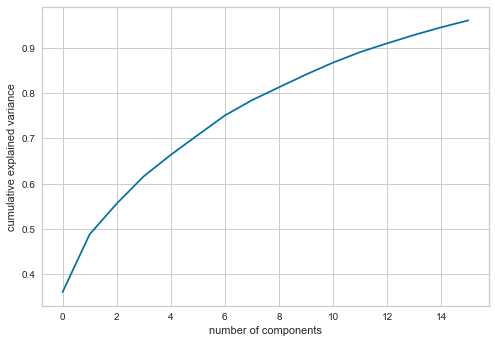

In [18]:
#Plotting the percentage of the variance in comparision to the components
#there is a 90% of variance, when chosing 14 components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA with 7 components

In [45]:
pca_foodDf = PCA(n_components=7)
## Use the scaled data
pca_foodDf.fit(scaled_ds)
## Next, let's create a DataFrame that will have the principal component values 
PCA_ds7 = pd.DataFrame(pca_foodDf.fit_transform(scaled_ds), columns=(["principal component 1","principal component 2", "principal component 3", "principal component 4", "principal component 5","principal component 6", "principal component 7"]))
PCA_ds7.describe().T

,count,mean,std,min,25%,50%,75%,max
principal component 1,2212.0,4.236113e-17,2.877608,-5.943929,-2.540901,-0.776393,2.409083,7.473633
principal component 2,2212.0,4.396724e-17,1.715110,-4.420945,-1.343327,-0.150609,1.241191,6.277101
principal component 3,2212.0,-6.665353e-17,1.249899,-3.979250,-0.847508,-0.019993,0.816349,5.597239
principal component 4,2212.0,-4.862872e-17,1.180098,-3.330622,-0.814057,-0.075851,0.794588,3.607477
principal component 5,2212.0,-1.354653e-16,1.046197,-3.406941,-0.710473,0.069277,0.738124,3.613479
principal component 6,2212.0,2.821435e-17,1.003897,-2.242682,-0.848880,0.006654,0.866121,2.266756
principal component 7,2212.0,7.967808e-17,0.997858,-3.479811,-0.655568,0.048823,0.694285,4.698543


In [46]:
#components in a dataframe
PCA7 = pd.DataFrame(pca_foodDf.components_, columns=scaled_ds.columns)

In [47]:
PCA7

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Store,NumWebVisitsMonth,Since_When,Age,Spending,Children,Family_Size,Parent,Education,Marital_Status_Partner
0,0.279079,-0.246129,-0.098439,0.003646,0.256043,0.238350,0.285383,0.248712,0.237318,0.188779,...,0.241712,-0.224658,0.028682,0.038366,0.320285,-0.247825,-0.219481,-0.242437,0.011060,-0.027518
1,0.169224,0.006666,0.455733,0.017470,0.209895,0.010903,0.008746,0.000855,0.022016,0.127375,...,0.204089,0.062724,0.105024,0.227253,0.133997,0.335724,0.342569,0.291532,0.132687,0.122970
2,-0.198182,0.130770,-0.179141,0.020173,-0.004785,0.110532,-0.005186,0.115440,0.115756,0.233448,...,0.007731,0.383115,0.510324,-0.355960,0.041105,-0.036400,-0.066710,0.042381,-0.384051,-0.069338
3,-0.068179,-0.244624,0.067641,-0.043767,0.150219,-0.221830,-0.116673,-0.224433,-0.225579,-0.019500,...,0.034546,0.218207,0.183936,0.228662,-0.011417,-0.126141,-0.393100,-0.035925,0.301007,-0.546982
4,-0.030597,-0.040747,-0.259207,-0.093710,0.221970,-0.204586,0.067579,-0.187024,-0.201830,-0.150658,...,0.003413,0.181655,0.269631,-0.095373,0.092234,-0.217426,0.137541,-0.161879,0.379316,0.601105
5,0.004441,-0.012430,0.014473,-0.977416,-0.025512,0.065739,-0.046803,0.040845,0.013806,0.028204,...,0.049746,0.010516,-0.124394,-0.071289,-0.020292,0.001605,-0.004682,0.039213,-0.034103,-0.011382
6,0.134230,0.460630,-0.187886,0.012049,0.139631,0.019496,0.237423,-0.024901,-0.007121,-0.167917,...,-0.005870,-0.028377,-0.167935,-0.460166,0.150668,0.193578,-0.015056,0.098128,0.399950,-0.331747


In [48]:
variance = pd.DataFrame(pca_foodDf.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.359864
1,0.127838
2,0.067893
3,0.060522
4,0.047567
5,0.043798
6,0.043273


## PCA with three components

In [19]:
#Initiating PCA to reduce dimensions or features to the first 3
## Pass the number of components (n_components=3) and finally call fit_transform on the aggregate data.
pca_foodDf = PCA(n_components=3)
## Use the scaled data
pca_foodDf.fit(scaled_ds)
## Next, let's create a DataFrame that will have the principal component values 
PCA_ds = pd.DataFrame(pca_foodDf.fit_transform(scaled_ds), columns=(["principal component 1","principal component 2", "principal component 3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
principal component 1,2212.0,2.780577e-16,2.877608,-5.943919,-2.540900,-0.776389,2.409080,7.473628
principal component 2,2212.0,1.514762e-16,1.715110,-4.420816,-1.343400,-0.150676,1.241105,6.277161
principal component 3,2212.0,7.302778e-17,1.249898,-3.985779,-0.846809,-0.020110,0.817024,5.602786


In [38]:
#To see the coefficient of every feature
pca_foodDf.components_

array([[ 0.27907915, -0.24612962, -0.09843897,  0.00364554,  0.25604263,
         0.23834964,  0.28538326,  0.2487123 ,  0.23731776,  0.18877908,
        -0.07725219,  0.16815094,  0.27738833,  0.24171218, -0.22465809,
         0.02868201,  0.03836544,  0.32028469, -0.2478248 , -0.21948148,
        -0.24243731,  0.01105968, -0.02751783],
       [ 0.16921683,  0.00665296,  0.45574545,  0.01746999,  0.20990194,
         0.0108965 ,  0.00875011,  0.00087454,  0.02201808,  0.12737853,
         0.35653711,  0.30051476,  0.10452798,  0.20407748,  0.06273589,
         0.10501759,  0.22724718,  0.13400378,  0.33572339,  0.34256882,
         0.29153136,  0.13269176,  0.12297059],
       [-0.19834822,  0.1307351 , -0.17908227,  0.02013618, -0.00454331,
         0.11035566, -0.0052849 ,  0.11558351,  0.11593471,  0.23357215,
         0.29211697,  0.19060866, -0.01671442,  0.00780367,  0.3832829 ,
         0.51022571, -0.35597204,  0.04122761, -0.03638221, -0.06670608,
         0.04241189, -0.3840

In [41]:
# to see the most important features for every PCA

for index, comp in enumerate(pca_foodDf.components_, 1):
    a = list(zip(scaled_ds.columns, abs(comp)))
    print('PCA_' + str(index))
    print(sorted(a, key=lambda x:x[1], reverse=True))
    print('\n')

PCA_1
[('Spending', 0.32028469375757607), ('Meat', 0.2853832639945068), ('Income', 0.2790791465947045), ('Catalog', 0.27738832774373395), ('Wines', 0.25604262586713084), ('Fish', 0.24871230378490827), ('Children', 0.24782480466453097), ('Kidhome', 0.2461296207364813), ('Parent', 0.24243731200129517), ('Store', 0.24171217874912496), ('Fruits', 0.238349644114499), ('Sweets', 0.23731775977066366), ('NumWebVisitsMonth', 0.22465808927811856), ('Family_Size', 0.21948148362076877), ('Gold', 0.18877908451423114), ('Web', 0.1681509372418315), ('Teenhome', 0.09843896857586314), ('NumDealsPurchases', 0.07725219347715331), ('Age', 0.03836544230060526), ('Since_When', 0.02868201039272782), ('Marital_Status_Partner', 0.027517827754712), ('Education', 0.011059676145109517), ('Recency', 0.003645543720429863)]


PCA_2
[('Teenhome', 0.45574544676554446), ('NumDealsPurchases', 0.35653710514112236), ('Family_Size', 0.3425688183597289), ('Children', 0.3357233879941284), ('Web', 0.30051475651771115), ('Pare

In [20]:
## Now the dataset is 2212 number of rows(this did not changed) and 3 columns or features
PCA_ds.shape

(2212, 3)

In [21]:
#?
PCA_ds.tail()

,principal component 1,principal component 2,principal component 3
2207,2.291730,2.265027,1.258910
2208,-3.078468,4.201610,-1.462612
2209,2.646780,-1.923160,0.054204
2210,1.522948,1.895518,-1.857888
2211,-2.715325,1.822130,-0.558629


In [22]:
#These values are very similar

loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10 = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10])

17    0.320285
6     0.285383
0     0.279079
12    0.277388
4     0.256043
7     0.248712
18   -0.247825
1    -0.246129
20   -0.242437
13    0.241712
dtype: float64


## PCA without selected features

In [392]:
to_drop = ["Marital_Status"]
scaled_ds_2 = scaled_ds.drop(to_drop, axis=1)

In [393]:
scaled_ds_2

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Web,Catalog,Store,NumWebVisitsMonth,Since_When,Age,Spending,Children,Family_Size,Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,1.791619,0.111982,-0.555814,-0.132545,0.124112,0.163575,1.218061,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,1.426865,-0.229679,-0.248141,0.692181,-1.940414,1.958607,-0.271040,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,-0.761665,0.111982,2.213242,0.279818,-0.847936,-1.033114,1.052052,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.697355,0.795303,1.290224,-0.957271,-0.843635,1.103830,0.391336,0.069987,0.449070,0.632456


In [394]:
#Initiating PCA to reduce dimensions or features to the first 3
## Pass the number of components (n_components=3) and finally call fit_transform on the aggregate data.
pca_income = PCA(n_components=3)
## Use the scaled data
pca_income.fit(scaled_ds_2)
## Next, let's create a DataFrame that will have the principal component values 
PCA_ds_income = pd.DataFrame(pca_income.fit_transform(scaled_ds_2), columns=(["principal component 1","principal component 2", "principal component 3"]))
PCA_ds_income.describe().T

,count,mean,std,min,25%,50%,75%,max
principal component 1,2212.0,-3.172066e-17,2.877421,-5.949911,-2.542373,-0.773382,2.375484,7.469745
principal component 2,2212.0,1.857064e-17,1.698131,-4.152667,-1.355102,-0.191348,1.248679,6.093080
principal component 3,2212.0,2.220948e-17,1.212651,-3.300119,-0.859100,0.005296,0.814193,6.260460


In [368]:
## Without Income
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.348700
1,0.128855
2,0.065051


In [389]:
# Without Spending
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.338828
1,0.129723
2,0.067702


In [395]:
# Without Maritial Status
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.376173
1,0.131016
2,0.066812


In [372]:
#Without Income and Spending
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.327190
1,0.131191
2,0.068125


In [377]:
#Without Income, Spending, Family Size, Children
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.313981
1,0.119205
2,0.072571


In [381]:
#Without Income, Spending, Wines, Meat
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.309510
1,0.136776
2,0.074926


In [385]:
#Without Income, Spending, Wines, Meat, Fish
variance = pd.DataFrame(pca_income.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.300826
1,0.142636
2,0.079075


## Plotting the three components in a 3-D Projection

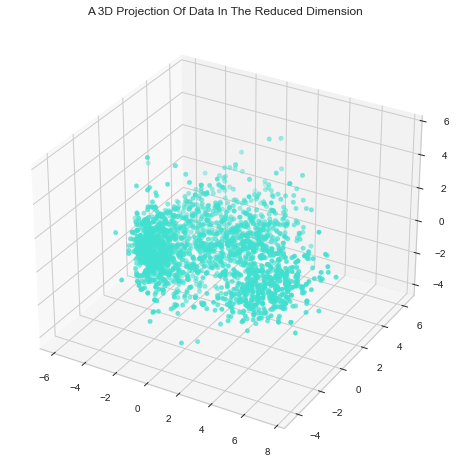

In [23]:
cmap = colors.ListedColormap(["#336699","#B3DAD1", "#648092","#20B2AA"])

#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["principal component 1"]
y =PCA_ds["principal component 2"]
z =PCA_ds["principal component 3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="turquoise", marker="o", cmap = cmap )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [24]:
## With the three components we get 54% variance
variance = pd.DataFrame(pca_foodDf.explained_variance_ratio_, columns=(["variance_ratio"]))
variance

,variance_ratio
0,0.359864
1,0.127838
2,0.067893


In [270]:
# The data now is reduced to 3 dimensions.

# Clustering

## Elbow Visualization with k=10

Elbow Method to determine the number of clusters to be formed:


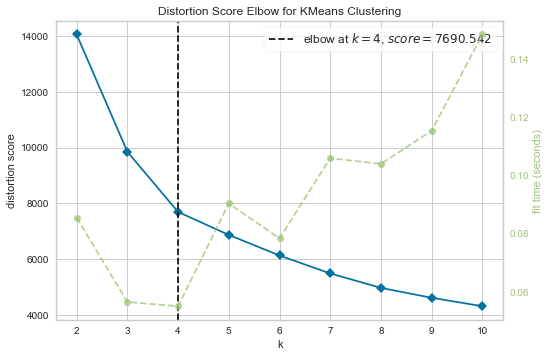

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

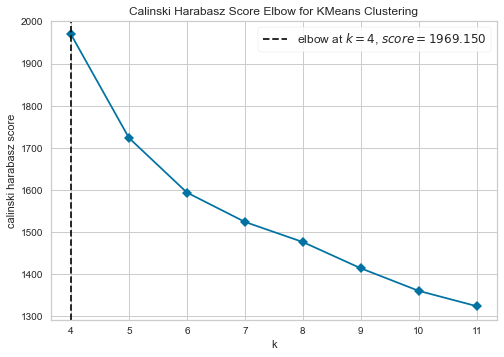

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
# we use the calinski_harabasz score and hide the time to fit the model

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(PCA_ds)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The graph indicates that 4 will be an optimal number of clusters for this data. 
First we will use a Agglomerative Clustering Model to get the final clusters.

## Agglomerative Clustering (hierarchial)

This clustering mechanism finds points of data that are closest to each other, and successively groups them together. 

The main hyperparameter of this mechanism is:
n_clusters (the number of clusters you want) — data are successively merged, one at a time, until there are n clusters remaining

Agglomerative clustering is hierarchical because it performs operations sequentially. This algorithm is useful in cases where you want to make decisions about how coarsely or finely you want to group your data, or what resolution you want your data in.

In [43]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters using the PCA dataframe
new_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = new_AC
#Adding the Clusters feature to the orignal dataframe
foodDf["Clusters"]= new_AC

In [28]:
foodDf

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Response,Since_When,Age,Spending,Children,Family_Size,Parent,Clusters
0,Graduate,Alone,58138.0,0,0,58,635,88,546,172,...,0,0,1,971,64,1617,0,1,0,2
1,Graduate,Alone,46344.0,1,1,38,11,1,6,2,...,0,0,0,125,67,27,2,3,1,3
2,Graduate,Partner,71613.0,0,0,26,426,49,127,111,...,0,0,0,472,56,776,0,2,0,2
3,Graduate,Partner,26646.0,1,0,26,11,4,20,10,...,0,0,0,65,37,53,1,3,1,1
4,Postgraduate,Partner,58293.0,1,0,94,173,43,118,46,...,0,0,0,321,40,422,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Graduate,Partner,61223.0,0,1,46,709,43,182,42,...,0,0,0,541,54,1341,1,3,1,0
2208,Postgraduate,Partner,64014.0,2,1,56,406,0,30,0,...,0,0,0,61,75,444,3,5,1,3
2209,Graduate,Alone,56981.0,0,0,91,908,48,217,32,...,0,0,0,315,40,1241,0,1,0,2
2210,Postgraduate,Partner,69245.0,0,1,8,428,30,214,80,...,0,0,0,316,65,843,1,3,1,0


In [49]:
#with 7 principal components
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
new_AC = AC.fit_predict(PCA_ds7)
PCA_ds7["Clusters"] = new_AC
#Adding the Clusters feature to the orignal dataframe.
foodDf["Clusters"]= new_AC

In [50]:
#with 7 principal components
foodDf["Clusters"].value_counts().sort_index()

0    957
1    207
2    623
3    425
Name: Clusters, dtype: int64

### Adding the Clusters to our dataframe

In [ ]:
#Adding the cluster column to the dataframe before it was encoded
#foodDfCluster["Clusters"]= new_AC

In [ ]:
#saving the new dataframe with the clusters to a new csv
#foodDfCluster.to_csv("final_project/marketing_campaign_with_clusters.csv", index = False)

### Plotting the three components in a 3-D Projection with the assigned clusters

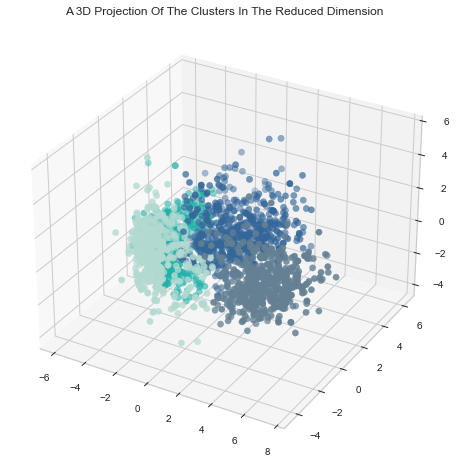

In [29]:
## To examine the formed clusters by the agg let's have a look at the 3-D distribution of the clusters.

cmap = colors.ListedColormap(["#336699","#B3DAD1", "#648092","#20B2AA"])

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("A 3D Projection Of The Clusters In The Reduced Dimension")
plt.show()

In [30]:
PCA_ds

,principal component 1,principal component 2,principal component 3,Clusters
0,4.966414,-0.294227,2.476073,2
1,-2.913722,-0.065174,-1.824993,3
2,2.590598,-0.805141,-0.139154,2
3,-2.705778,-1.634394,-0.371724,1
4,-0.622653,0.360116,0.074473,0
...,...,...,...,...
2207,2.291730,2.265027,1.258910,0
2208,-3.078468,4.201610,-1.462612,3
2209,2.646780,-1.923160,0.054204,2
2210,1.522948,1.895518,-1.857888,0


## Distribution of the clusters

In [31]:
## Let's check the distribution of the clusters after using Agglomerative Clustering
#clusters = kmeans.predict(pca_df)
#clusters
foodDf["Clusters"].value_counts().sort_index()

0    657
1    609
2    497
3    449
Name: Clusters, dtype: int64

- 0    708
- 1    487
- 2    580
- 3    437

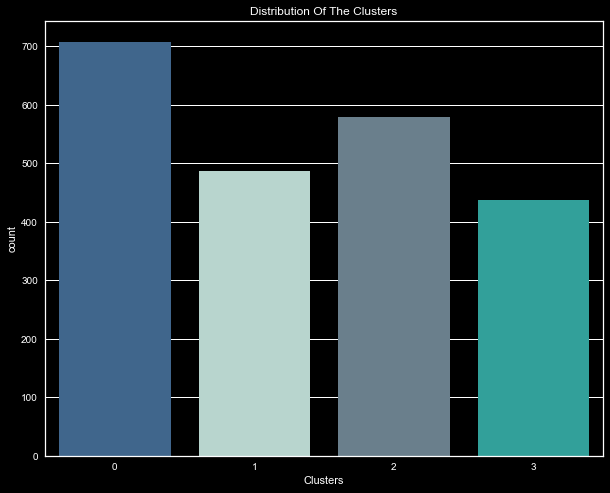

In [330]:
#Plotting countplot of clusters
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
plt.figure(figsize=(10,8))
plt.style.use('dark_background')

pl = sns.countplot(x=foodDf["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

## K-MEANS Clustering (simultaneous)

This clustering mechanism is useful when you want to divide your data in the k sets simultaneously. It’s useful when data needs to be compared to each other and is “comparable”.

## K-Means with 3 clusters

In [34]:
### 1234 to work always with the same features
### We will pick manually the number of clusters we want
kmeans = KMeans(n_clusters=3 , random_state=1234)
kmeans.fit(PCA_ds)

KMeans(n_clusters=3, random_state=1234)

In [35]:
len(kmeans.labels_)

2212

### Plotting the 3 clusters

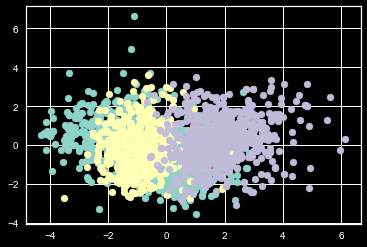

In [335]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assign a cluster to each example
labels = kmeans.predict(PCA_ds)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(PCA_ds.to_numpy()[row_ix, 1], PCA_ds.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

### Distribution of the 3 clusters

In [336]:
## Now we have our "model", let's get the clusters and how many observations has each cluster.
clusters = kmeans.predict(PCA_ds)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1002
1     535
2     675
dtype: int64

## K-Means with 4 clusters

In [337]:
### 1234 to work always with the same features
### We will pick manually the number of clusters we want
kmeans = KMeans(n_clusters=4 , random_state=1234)
kmeans.fit(PCA_ds)

KMeans(n_clusters=4, random_state=1234)

### Plotting the 3 clusters

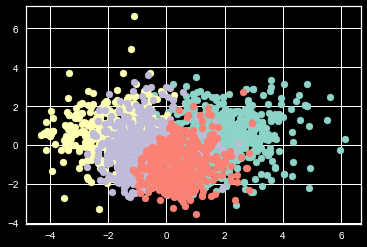

In [338]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assign a cluster to each example
labels = kmeans.predict(PCA_ds)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(PCA_ds.to_numpy()[row_ix, 1], PCA_ds.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

### Distribution of the 4 clusters

In [339]:
## Now we have our "model", let's get the clusters and how many observations has each cluster.
clusters = kmeans.predict(PCA_ds)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    682
1    586
2    515
3    429
dtype: int64

#Compared with the AggloModel above
- 0:    708
- 1:    487
- 2:    580
- 3:    437

In [341]:
PCA_ds["cluster"] = clusters
PCA_ds

,principal component 1,principal component 2,principal component 3,Clusters,cluster
0,4.994347,-0.151102,2.647927,1,2
1,-2.884455,-0.006651,-1.863162,3,3
2,2.617866,-0.721027,-0.253689,1,2
3,-2.676035,-1.541942,-0.923235,2,1
4,-0.649590,0.209946,-0.018412,0,0
...,...,...,...,...,...
2207,2.321338,2.436445,0.519564,0,0
2208,-3.105956,4.020900,-1.494367,0,0
2209,2.673666,-1.869186,0.596451,1,2
2210,1.494057,1.701809,-1.630656,0,0


In [340]:
## Inertia tt is the mean squared distance between each instance and its closest centroid. 
## It's stored in the inertia_ attribute of the model.
kmeans.inertia_

7935.858579880371

## Elbow

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

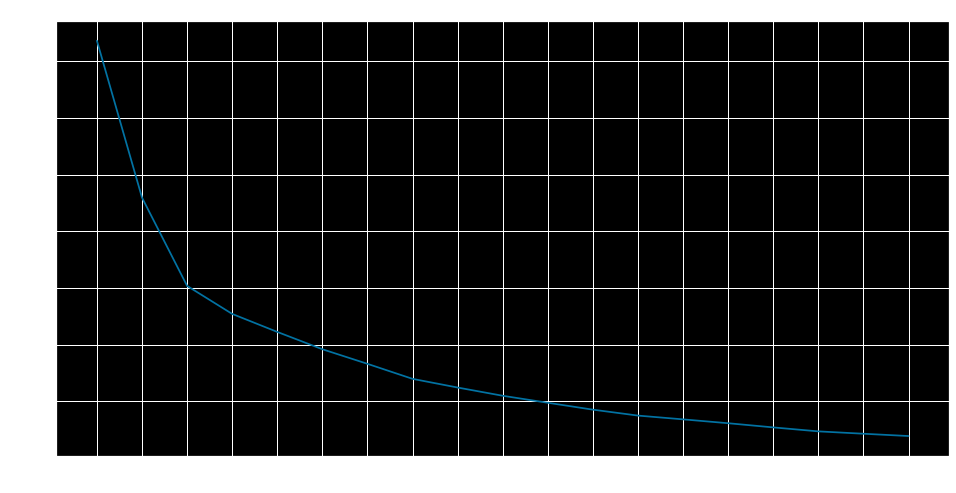

In [36]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(PCA_ds)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [132]:
## The elbow is telling us that the optimal number of clusters are 3 or 4

## Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

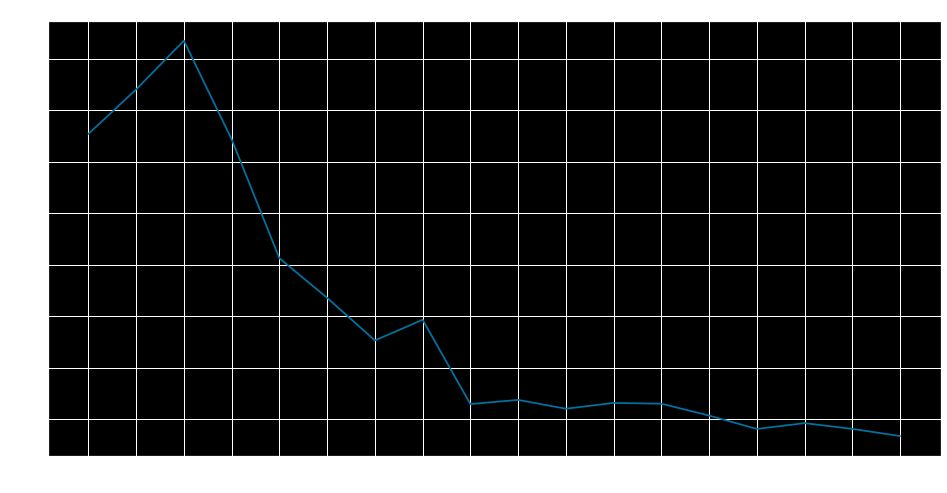

In [37]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(PCA_ds)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(PCA_ds, kmeans.predict(PCA_ds)))


plt.figure(figsize=(16,8))
# use a gray background
#ax = plt.axes(facecolor='#0B1B2A')
#ax.set_axisbelow(True)
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [134]:
## The silhouette is telling us that the optimal number of clusters are 3

In [ ]:
# Save the figure to a file
#plt.savefig("dark.png")

# Visualization

## Spending and Income

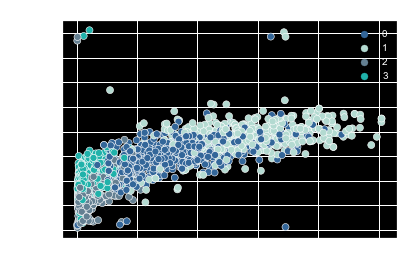

In [344]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Income"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [39]:
## Average income
foodDf["Income"].mean()

51958.81057866185

In [40]:
## Average income
foodDf["Spending"].mean()

607.2680831826401

Income vs spending plot shows the clusters pattern

- group 0: high spending & average/high income
- group 1: high spending & high income
- group 2: low spending & average income
- group 3: low spending & average/high income

In [345]:
## Average income
foodDf["Age"].mean()

52.08634719710669

## Spending and Products

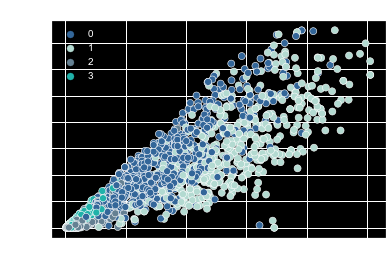

In [346]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Wines"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

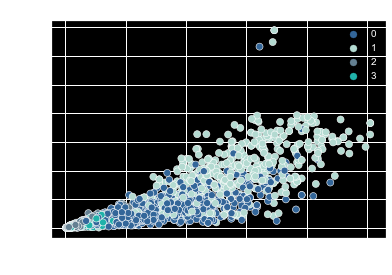

In [347]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Meat"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

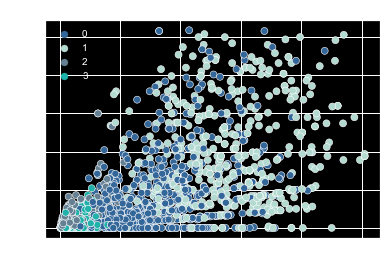

In [360]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Fish"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

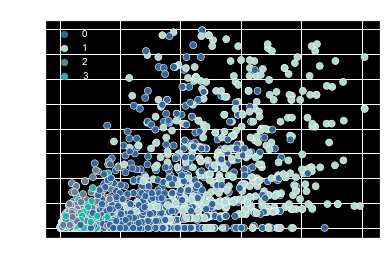

In [359]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Fruits"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

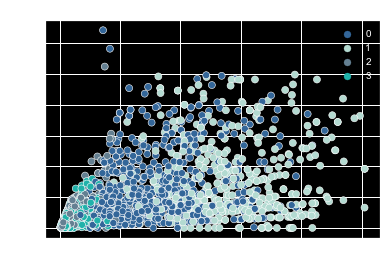

In [361]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Gold"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

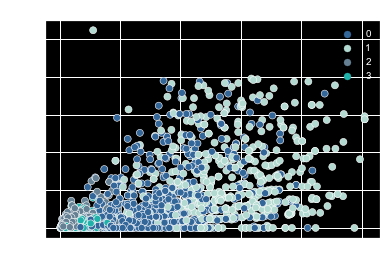

In [362]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Sweets"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## Income and Products

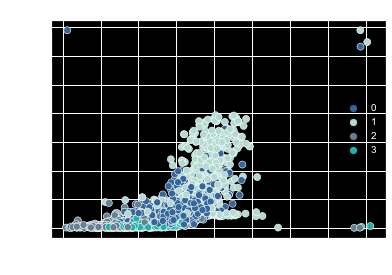

In [399]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Income"], y=foodDf["Meat"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.xlabel('number of spending')
plt.ylabel('Meat')
plt.show()

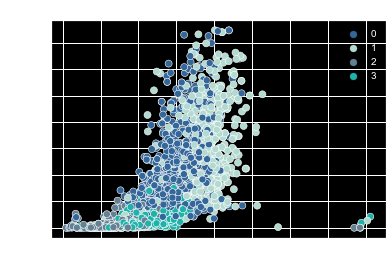

In [349]:
pal = ["#336699","#B3DAD1", "#648092","#20B2AA"]
pl = sns.scatterplot(data = foodDf,x=foodDf["Income"], y=foodDf["Wines"],hue=foodDf["Clusters"], palette= pal)


pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## Spending

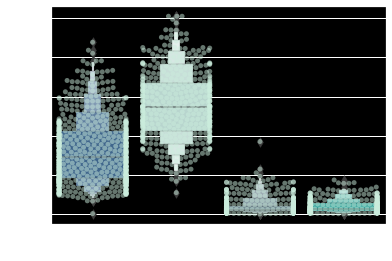

In [350]:
plt.figure()
pl=sns.swarmplot(x=foodDf["Clusters"], y=foodDf["Spending"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=foodDf["Clusters"], y=foodDf["Spending"], palette=pal)
plt.show()

Cluster 1 is the one with higher spending, followed by cluster 0. This two would be then our most important clusters.

# Profiling

In [65]:
foodDf

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Response,Since_When,Age,Spending,Children,Family_Size,Parent,Clusters
0,0,0,58138.0,0,0,58,635,88,546,172,...,0,0,1,971,64,1617,0,1,0,1
1,0,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,125,67,27,2,3,1,3
2,0,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,472,56,776,0,2,0,1
3,0,1,26646.0,1,0,26,11,4,20,10,...,0,0,0,65,37,53,1,3,1,2
4,1,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,321,40,422,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0,1,61223.0,0,1,46,709,43,182,42,...,0,0,0,541,54,1341,1,3,1,0
2208,1,1,64014.0,2,1,56,406,0,30,0,...,0,0,0,61,75,444,3,5,1,0
2209,0,0,56981.0,0,0,91,908,48,217,32,...,0,0,0,315,40,1241,0,1,0,2
2210,1,1,69245.0,0,1,8,428,30,214,80,...,0,0,0,316,65,843,1,3,1,0


<Figure size 432x288 with 0 Axes>

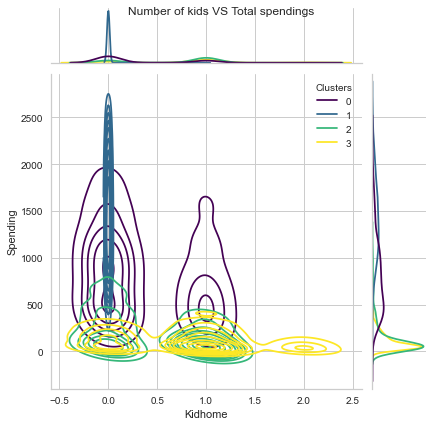

In [67]:
# distribution of clusters : Kidhome vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Kidhome"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Number of kids VS Total spendings')
plt.show()

<Figure size 432x288 with 0 Axes>

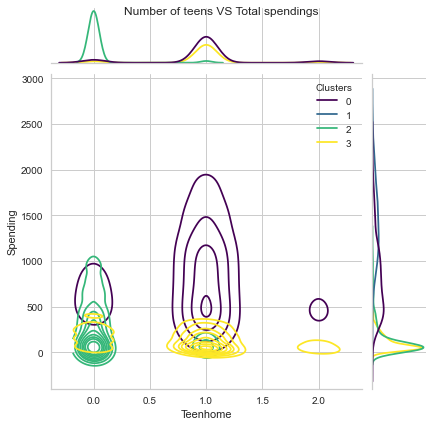

In [48]:
# distribution of clusters : Teenhome vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Teenhome"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Number of teens VS Total spendings')
plt.show()

<Figure size 432x288 with 0 Axes>

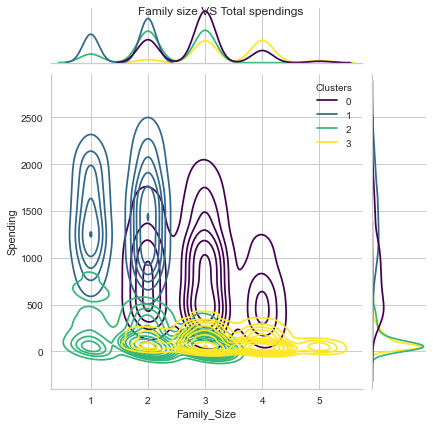

In [68]:
# Distribution of clusters : Family size vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Family_Size"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Family size VS Total spendings')
plt.show()

In [51]:
foodDf.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Since_When', 'Age', 'Spending',
       'Children', 'Family_Size', 'Parent', 'Clusters'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

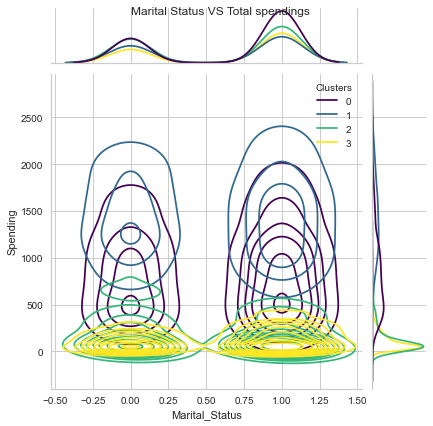

In [69]:
# distribution of clusters : Marital Status vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Marital_Status"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Marital Status VS Total spendings')
plt.show()

<Figure size 432x288 with 0 Axes>

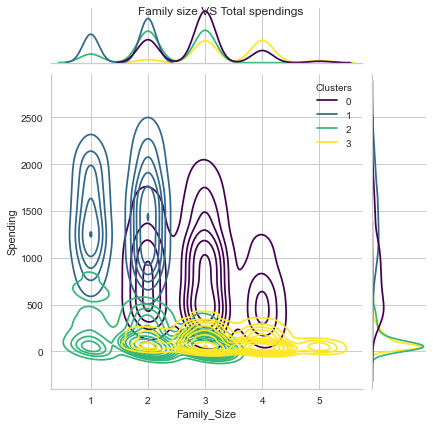

In [70]:
# distribution of clusters : Family size vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Family_Size"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Family size VS Total spendings')
plt.show()

<Figure size 432x288 with 0 Axes>

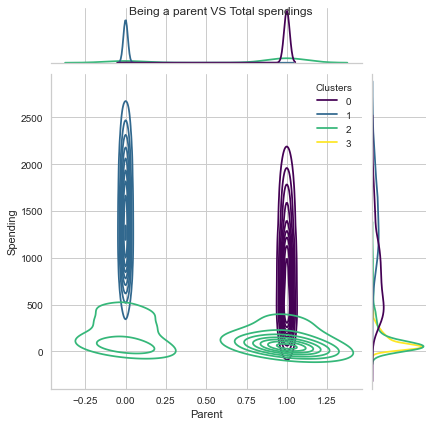

In [71]:
# distribution of clusters : Is Parent  vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Parent"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Being a parent VS Total spendings')
plt.show()

## Comparing the success of the earlier campaigns

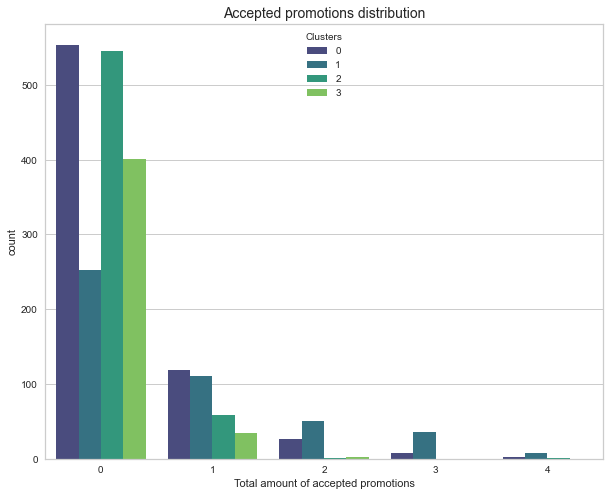

In [81]:
# Construct a new feature to make things easier
plt.figure(figsize=(10,8))
foodDfCluster["Total_Promotions"] = foodDfCluster["AcceptedCmp1"] + foodDfCluster["AcceptedCmp2"] + foodDfCluster["AcceptedCmp3"] + foodDfCluster["AcceptedCmp4"] + foodDfCluster["AcceptedCmp5"]
count_promotions = sns.countplot(x=foodDfCluster["Total_Promotions"], hue=foodDfCluster["Clusters"], palette="viridis")
count_promotions.set_xlabel("Total amount of accepted promotions")
count_promotions.set_title("Accepted promotions distribution", fontsize=14)
plt.show()

# Conclusions

In [118]:
## Distribution of clusters

<Figure size 432x288 with 0 Axes>

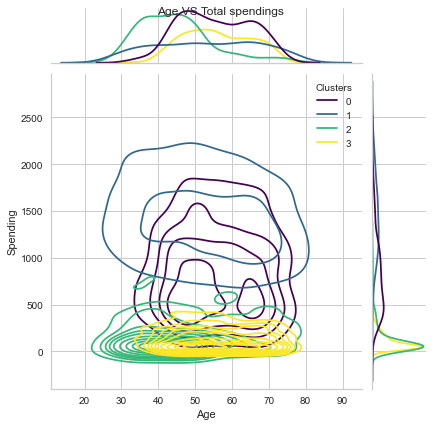

In [72]:
# distribution of clusters : Age vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Age"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Age VS Total spendings')
plt.show()

In [120]:
## Cluster 0 goes from 38-78
## cluster 1 goes from 20-80. Younger people are in this cluster
## Cluster 2 goes from 25 to 80
## Cluster 3 goes from almost 32 to 78


<Figure size 432x288 with 0 Axes>

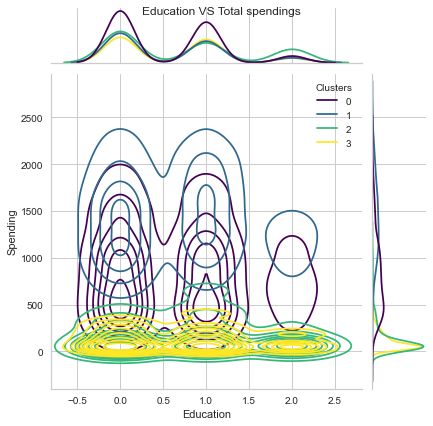

In [73]:
# distribution of clusters : Education vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Education"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Education VS Total spendings')
plt.show()

<Figure size 432x288 with 0 Axes>

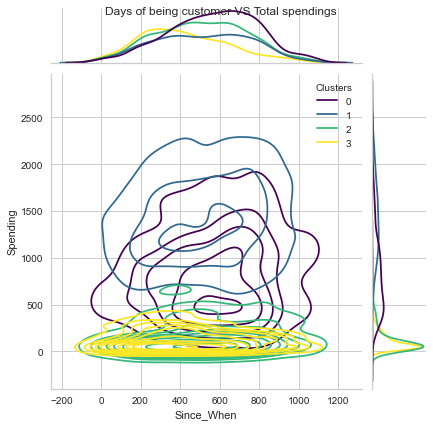

In [59]:
# distribution of clusters : Days of being customer vs Spendings
plt.figure()
sns.jointplot(x=foodDf["Since_When"], y=foodDf["Spending"], hue=foodDf["Clusters"], kind="kde", palette="viridis").fig.suptitle('Days of being customer VS Total spendings')
plt.show()

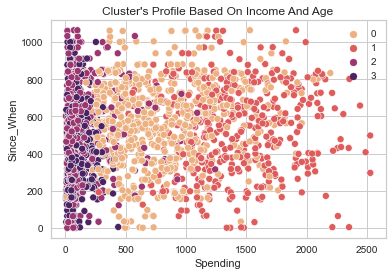

In [61]:
pl = sns.scatterplot(data = foodDf,x=foodDf["Spending"], y=foodDf["Since_When"],hue=foodDf["Clusters"], palette = "flare")
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend()
plt.show()

In [295]:
## Postgraduation is 1(38% of the total), 2 is Undergraduated (11% of the total), 0 is Graduated(50% of the total)
## The majority of people that are Graduated and Postgraduated they belong to Cluster 2, followed by custer 0. 
## Cluster 2 followed by Cluster 0 are the ones with higher spent. Who are also people mostly Graduated and Postgrad.
## Cluster 3 and cluster 1 they are equaly distributed for Graduated and POstgraduated. There are also quite some people
# from this clusters who Undergraduated(see in 2.0)
## Cluster 3 and 1 are low spending 


In [294]:
foodDf['Education'].value_counts()/len(foodDf['Education'])

0    0.504069
1    0.382007
2    0.113924
Name: Education, dtype: float64

## Summary of the clusters

#CLUSTER 0

- They are parents. 
- Familiy size goes from 2-4
- Most of them have a teen at home
- Age goes from 38-78
- Spending: second cluster with higher spend after the cluster 1
- Income: high spending & average/high income
- Majority of customers are found here

#CLUSTER 1

- They are not parents
- Their family size goes from 1-2 (Single or Couple)
- Age goes from 25 to 80. The second youngest cluster after the Cluster 2
- Spending: is the cluster with the highest spending
- Income: high spending & high income

#CLUSTER 2

- They are parents.
- Family size goes from 1-3
- The mayority have a teen at home but not a kid
- Is the yungest cluster. Age goes from 20-80.
- Spending: is the cluster with less spending. 
- Income: low spending & average income

#CLUSTER 3
- They are parents.
- Family size goes from 3-5, cluster with the biggest families
- They got teen and kids at home
- Age goes from almost 32 to 78
- Spending: the third cluster with less spending. Just cluster 2 is spending less
- Income:low spending & average/high income